Autor : Daniel Ivan Medina Barreras

[Datos](https://github.com/noelDz/COVID19_Mx_opendata)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc


import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.figure_factory as ff

import seaborn as sb

import pandas_profiling

/home/saxsa/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
init_notebook_mode(connected=True)

In [3]:
%matplotlib inline

Lectura de la fuente de información

In [4]:
sospechoso = pd.read_csv('./COVID19_Mx_opendata/Sospechoso/Datos_Covid_03_30_2020.csv')

In [5]:
positivo = pd.read_csv('./COVID19_Mx_opendata/Positivo/Datos_Covid_03_30_2020.csv')

Los metadatos de la fuente de información

In [6]:
sospechoso.columns

Index(['N_Caso', 'Estado', 'Sexo', 'Edad', 'Fecha de Inicio de sintomas',
       'Identificación de COVID-19 por RT-PCR en tiempo real', 'Procedencia',
       'Fecha del llegada a Mexico'],
      dtype='object')

In [7]:
sospechoso.head()

,N_Caso,Estado,Sexo,Edad,Fecha de Inicio de sintomas,Identificación de COVID-19 por RT-PCR en tiempo real,Procedencia,Fecha del llegada a Mexico
0,1,PUEBLA,M,49,15/03/2020,Sospechoso,Contacto,NaN
1,2,BAJA CALIFORNIA,F,34,14/03/2020,Sospechoso,Estados Unidos,08/03/2020
2,3,CIUDAD DE MÉXICO,F,69,25/02/2020,Sospechoso,Italia,03/03/2020
3,4,JALISCO,M,19,18/03/2020,Sospechoso,España,17/03/2020
4,5,AGUASCALIENTES,M,36,12/03/2020,Sospechoso,Estados Unidos,13/03/2020


In [8]:
sospechoso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 8 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   N_Caso                                                2703 non-null   int64 
 1   Estado                                                2703 non-null   object
 2   Sexo                                                  2703 non-null   object
 3   Edad                                                  2703 non-null   int64 
 4   Fecha de Inicio de sintomas                           2703 non-null   object
 5   Identificación de COVID-19 por RT-PCR en tiempo real  2703 non-null   object
 6   Procedencia                                           2703 non-null   object
 7   Fecha del llegada a Mexico                            543 non-null    object
dtypes: int64(2), object(6)
memory usage: 169.1+ KB


In [9]:
DataFrameAnalisisEstadistico=sospechoso.describe()

In [10]:
DataFrameAnalisisEstadistico

,N_Caso,Edad
count,2703.000000,2703.000000
mean,1376.164632,37.945246
std,794.621728,17.514358
min,1.000000,0.000000
25%,688.500000,27.000000
50%,1376.000000,36.000000
75%,2063.500000,49.000000
max,2752.000000,94.000000


In [11]:
d=ff.create_table(DataFrameAnalisisEstadistico)

In [12]:
iplot(d)

In [13]:
AnalisisEstadisticoPromedioXGenero=sospechoso.groupby('Sexo').mean()

In [14]:
AnalisisEstadisticoPromedioXGenero

,N_Caso,Edad
Sexo,,
F,1373.641304,37.872283
M,1379.181966,38.032494


In [15]:
ColoresComponentesTabla=[[0,'#4d004c'],[.5,'#f2e5ff'],[1,'#ffffff']]

In [16]:
ColoresLetra=['#000000']

In [17]:
dz=ff.create_table(AnalisisEstadisticoPromedioXGenero,index=True,colorscale=ColoresComponentesTabla,font_colors=ColoresLetra)
iplot(dz)

## Despliegue gráfico de resultados

In [18]:
col="Sexo"
AnalisisFrecuenciaXGenero=sospechoso[col].value_counts().reset_index()

In [19]:
AnalisisFrecuenciaXGenero

,index,Sexo
0,F,1472
1,M,1231


In [20]:
AnalisisFrecuenciaXGenero=AnalisisFrecuenciaXGenero.rename(columns={col:"count","index":col})

In [21]:
AnalisisFrecuenciaXGenero

,Sexo,count
0,F,1472
1,M,1231


## Gráfica distribución registros X género

In [22]:
trace=go.Pie(labels=AnalisisFrecuenciaXGenero[col],values=AnalisisFrecuenciaXGenero['count'],pull=[0.05,0])
layout={'title':'Género(Hombre, Mujer) de casos sospechoso'}
fig=go.Figure(data=[trace],layout=layout)
iplot(fig)

## Distribución Edad

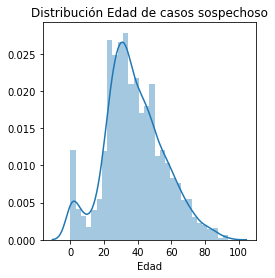

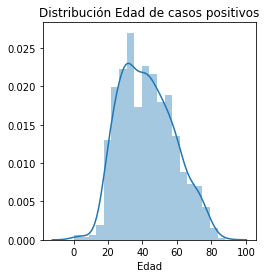

In [23]:
plt.figure(figsize=(13,4))
plt.subplot(1,3,1)
sns.distplot(sospechoso['Edad'])
plt.title('Distribución Edad de casos sospechoso')
plt.figure(figsize=(13,4))
plt.subplot(1,3,1)
sns.distplot(positivo['Edad'])
plt.title('Distribución Edad de casos positivos')

plt.show()

In [24]:
x=sospechoso
col='Edad'
v1=x[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x: 100 *x/sum(v1['count']))
v1=v1.sort_values(col)
trace1=go.Bar(x=v1[col],y=v1["count"],name="0",marker=dict(color="rgb(63, 72, 204)"))
y=[trace1]
layout={'title':"Distribución Edad de casos sospechoso ",'xaxis':{'title':"Edad"},'yaxis':{'title':"Frecuencia"}}
fig=go.Figure(data=y,layout=layout)
fig.layout.template='presentation'
iplot(fig)

In [25]:
x=positivo
col='Edad'
v1=x[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x: 100 *x/sum(v1['count']))
v1=v1.sort_values(col)
trace1=go.Bar(x=v1[col],y=v1["count"],name="0",marker=dict(color="rgb(63, 72, 204)"))
y=[trace1]
layout={'title':"Distribución Edad de casos Positivos",'xaxis':{'title':"Edad"},'yaxis':{'title':"Frecuencia"}}
fig=go.Figure(data=y,layout=layout)
fig.layout.template='presentation'
iplot(fig)

# Serie de tiempo: Casos por fecha

## Casos de COVID19 sospechosos por día

In [26]:
casos_fecha_sospechoso = pd.DataFrame(sospechoso['Identificación de COVID-19 por RT-PCR en tiempo real']).groupby(sospechoso['Fecha de Inicio de sintomas']).count()
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=casos_fecha_sospechoso.index,
                y=casos_fecha_sospechoso["Identificación de COVID-19 por RT-PCR en tiempo real"],
                mode='lines+markers',
                name="Casos Nuevos Hombres",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=casos_fecha_sospechoso.index,
                y=sc.cumsum(casos_fecha_sospechoso["Identificación de COVID-19 por RT-PCR en tiempo real"]),
                mode='lines+markers',
                name="Casos Totales Hombres",
                line_color='#ff7f0e',
                opacity=0.8))
# Edit the layout
fig.update_layout(title='Casos de COVID19 sospechosos por día',
                   xaxis_title='Fecha',
                   yaxis_title='Número de casos')
fig.show()

## Casos de COVID19 positivo en México por día

In [27]:
casos_fecha_positivo= pd.DataFrame(positivo['Identificación de COVID-19 por RT-PCR en tiempo real'].groupby(positivo['Fecha de Inicio de sintomas']).count())
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=casos_fecha_positivo.index,
                y=casos_fecha_positivo['Identificación de COVID-19 por RT-PCR en tiempo real'],
                mode='lines+markers',
                name="Casos positivo Nuevos",
                line_color='#a678de',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=casos_fecha_positivo.index,
                y=sc.cumsum(casos_fecha_positivo['Identificación de COVID-19 por RT-PCR en tiempo real']),
                mode='lines+markers',
                name="Casos positivo Totales",
                line_color='#ff7f0e',
                opacity=0.9))
# Edit the layout
fig.update_layout(title='Casos de COVID19 positivo en México por día',
                   xaxis_title='Fecha',
                   yaxis_title='Número de casos')
fig.show()

In [28]:
casos_fecha_positivo= pd.DataFrame(positivo['Identificación de COVID-19 por RT-PCR en tiempo real'].groupby(positivo['Fecha de Inicio de sintomas']).count())
casos_fecha_sospechoso = pd.DataFrame(sospechoso['Identificación de COVID-19 por RT-PCR en tiempo real']).groupby(sospechoso['Fecha de Inicio de sintomas']).count()

fig = go.Figure()


fig.add_trace(go.Scatter(
                x=casos_fecha_sospechoso.index,
                y=sc.cumsum(casos_fecha_sospechoso['Identificación de COVID-19 por RT-PCR en tiempo real']),
                mode='lines+markers',
                name="Casos sospechoso Totales",
                line_color='#ff7f0e',
                opacity=0.9))

fig.add_trace(go.Scatter(
                x=casos_fecha_positivo.index,
                y=sc.cumsum(casos_fecha_positivo['Identificación de COVID-19 por RT-PCR en tiempo real']),
                mode='lines+markers',
                name="Casos positivo Totales",
                line_color='deepskyblue',
                opacity=0.9))

# Edit the layout
fig.update_layout(title='Casos de COVID19 [positivos vs sospechosos] Totales',
                   xaxis_title='Fecha',
                   yaxis_title='Número de casos')
fig.show()

In [29]:
casos_fecha_positivo= pd.DataFrame(positivo['Identificación de COVID-19 por RT-PCR en tiempo real'].groupby(positivo['Fecha de Inicio de sintomas']).count())
casos_fecha_sospechoso = pd.DataFrame(sospechoso['Identificación de COVID-19 por RT-PCR en tiempo real']).groupby(sospechoso['Fecha de Inicio de sintomas']).count()

fig = go.Figure()


fig.add_trace(go.Scatter(
                x=casos_fecha_sospechoso.index,
                y=casos_fecha_sospechoso['Identificación de COVID-19 por RT-PCR en tiempo real'],
                mode='lines+markers',
                name="Casos sospechoso Nuevos",
                line_color='#ff7f0e',
                opacity=0.9))

fig.add_trace(go.Scatter(
                x=casos_fecha_positivo.index,
                y=casos_fecha_positivo['Identificación de COVID-19 por RT-PCR en tiempo real'],
                mode='lines+markers',
                name="Casos positivo Nuevos",
                line_color='deepskyblue',
                opacity=0.9))

# Edit the layout
fig.update_layout(title='Casos de COVID19 [positivos vs sospechosos] Nuevos por dia',
                   xaxis_title='Fecha',
                   yaxis_title='Número de casos')
fig.show()